# Bank Churn Prediction Problem

## Context

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

## Objective

The aim of this analysis is to find whether a customer will leave a bank or not in the next six months using neural networks.

## Data Dictionary

**CustomerId:** Unique ID which is assigned to each customer<br>
**Surname:** Last name of the customer <br>
**CreditScore:** It defines the credit history of the customer.  
**Geography:** A customer’s location    
**Gender:** It defines the Gender of the customer   
**Age:** Age of the customer     
**Tenure:** Number of years for which the customer has been with the bank<br>
**NumOfProducts:** It refers to the number of products that a customer has purchased through the bank.<br>
**Balance:** Account balance<br>
**HasCrCard:** It is a categorical variable that decides whether the customer has a credit card or not.<br>
**EstimatedSalary:** Estimated salary <br>
**isActiveMember:** It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )<br>
**Exited:** It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values 

## Importing important libraries

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# Library to encode the variables
from sklearn import preprocessing

# To plot confusion matrix
from sklearn.metrics import confusion_matrix

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler

#To import different metrics 
from sklearn import metrics
import sklearn 
from tensorflow.keras import backend
from sklearn.metrics import classification_report

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

# importing different functions to build models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout


# Convert to "one-hot" vectors using the to_categorical function
from tensorflow.keras.utils import to_categorical

## Loading and exploring data

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
df = pd.read_csv('/content/drive/My Drive/UTA-AIML/Introduction_to_neural_networks/Project/Churn.csv')

In [4]:
print("The dataset has {} rows and {} columns".format(df.shape[0],df.shape[1])) # prints the number of rows and columns of dataset

The dataset has 10000 rows and 14 columns


In [5]:
# using random to display random rows rather than only first 5 and last 5
np.random.seed(1)
df.sample(n=10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9953,9954,15655952,Burke,550,France,Male,47,2,0.00,2,1,1,97057.28,0
3850,3851,15775293,Stephenson,680,France,Male,34,3,143292.95,1,1,0,66526.01,0
4962,4963,15665088,Gordon,531,France,Female,42,2,0.00,2,0,1,90537.47,0
3886,3887,15720941,Tien,710,Germany,Male,34,8,147833.30,2,0,1,1561.58,0
5437,5438,15733476,Gonzalez,543,Germany,Male,30,6,73481.05,1,1,1,176692.65,0
8517,8518,15671800,Robinson,688,France,Male,20,8,137624.40,2,1,1,197582.79,0
2041,2042,15709846,Yeh,840,France,Female,39,1,94968.97,1,1,0,84487.62,0
1989,1990,15622454,Zaitsev,695,Spain,Male,28,0,96020.86,1,1,1,57992.49,0
1933,1934,15815560,Bogle,666,Germany,Male,74,7,105102.50,1,1,1,46172.47,0
9984,9985,15696175,Echezonachukwu,602,Germany,Male,35,7,90602.42,2,1,1,51695.41,0


In [6]:
df.info() # Function to display the shape, missing values and datatypes of columns in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


 - We can see that there are no null values in the dataset.<br>
 - The Surname, Geography and Gender columns are of object data type.
 - We will not need RowNumber, CustomerId and Surname in our further analysis  as they are unique to the user, So let us drop these columns.<br>



In [7]:
df = df.drop(['RowNumber','CustomerId','Surname'], axis = 1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


__Observations:__

 - Credit score ranges from 350 to 850 with an ab=verage of 652.<br>
 - The customer age group is between 18 to 92 at and average of 37.<br>
 - There are some customers who have recently joined while some have been with the bank for 10 years.<br>
 - Around 25% of the customers have an account balance 0. Further analysis have to be done here.<br>
 - There are a maximum of  credit cards being used by the customers.<br>
 - About 25% of the customers do not have credit cards as well. We will have to see if this has any relation with account balance.<br>
 - 25% of customers are not an active member, this explains the 0 account balance and no credit cards.<br>
 - The estimated salary ranges from 11.58 to 199992.48, considering it to be in thousands while this does not affect the analysis.<br>


In [9]:
df.isnull().sum() # function to check for null values

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

The dataset does not have any null values

In [10]:
data_init = df.copy()

## Univariate Analysis

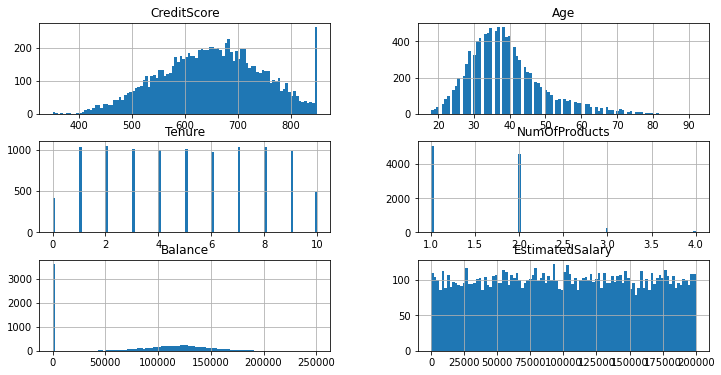

In [11]:
columns = ['CreditScore','Age','Tenure','NumOfProducts','Balance','EstimatedSalary'] 
df[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 

__Observations:__

- The credit score is left skewed.
- The age is right skewed where it ranges from 18 to 92, with an average of 37. There are very few customers who are above age 70.
- Tenure is even between 1 to 9, there are few customers who have joined recently and few have been using the services for 10 years.
- Majority of the customers have 1 or 2 credit cards. Very few have 3 or 4 cards.
- Nearly 4000 customers seem to have 0 balance. This have to be checked with whether the customer is still using the services.
- The estimated salary ranges from 11.58 to 199992.48.


#### Observations on Geography

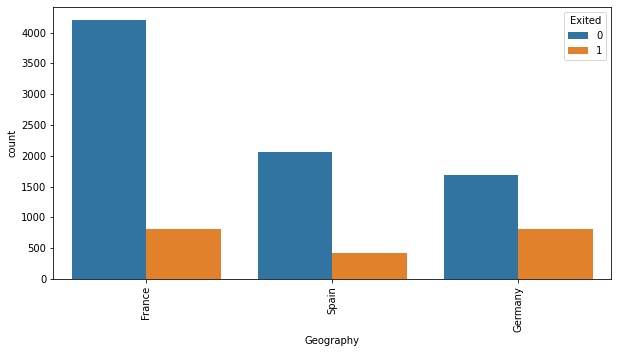

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Geography', hue = 'Exited')
plt.xticks(rotation=90)
plt.show()

__Observations:__

 - The customers are based from France, Spain and Germany.
 - Majority of the customers are from France.
 - Germany have very few customer
 - The maximum number of customers who have exited are also from Germany.

#### Observations on Gender

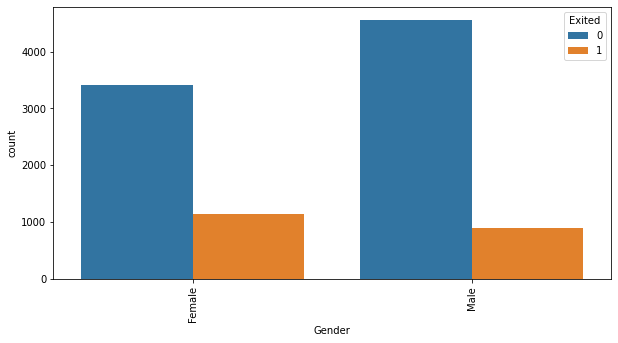

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Gender',hue = 'Exited')
plt.xticks(rotation=90)
plt.show()

__Observations:__

 - Majority of the customers are male.
 - But female customers who have exited are more in ratio when compared with male customers.

## Bivariate Analysis

In [14]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


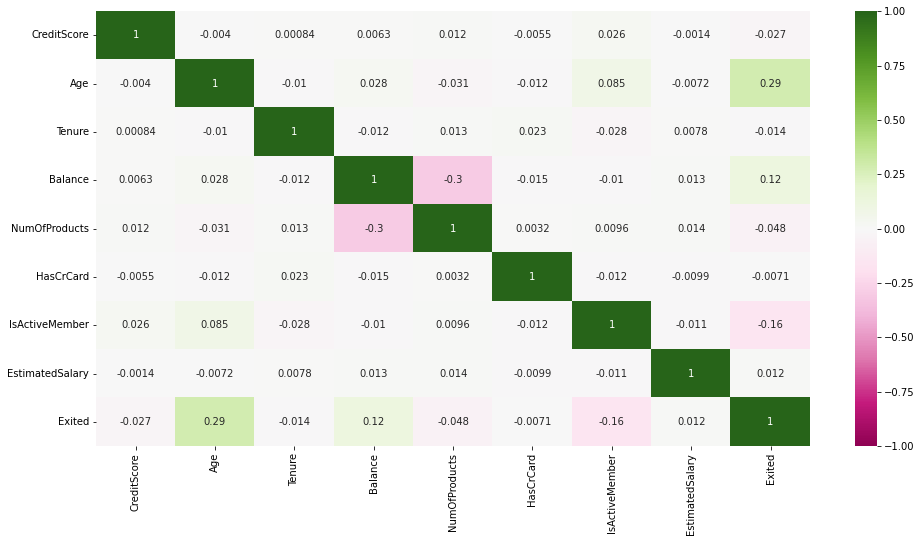

In [15]:
plt.figure(figsize = (16,8))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap="PiYG");

__Observations:__

 - There is a positive correlation between age and exited.
 - There is a positive correlation between balance and exited.
 - There is a negative correlation between IsActiveMember and exited.
 - There is a small negative correlation between NumOfProducts and Balance.
 - No other correlation can be depicted from the above graph.

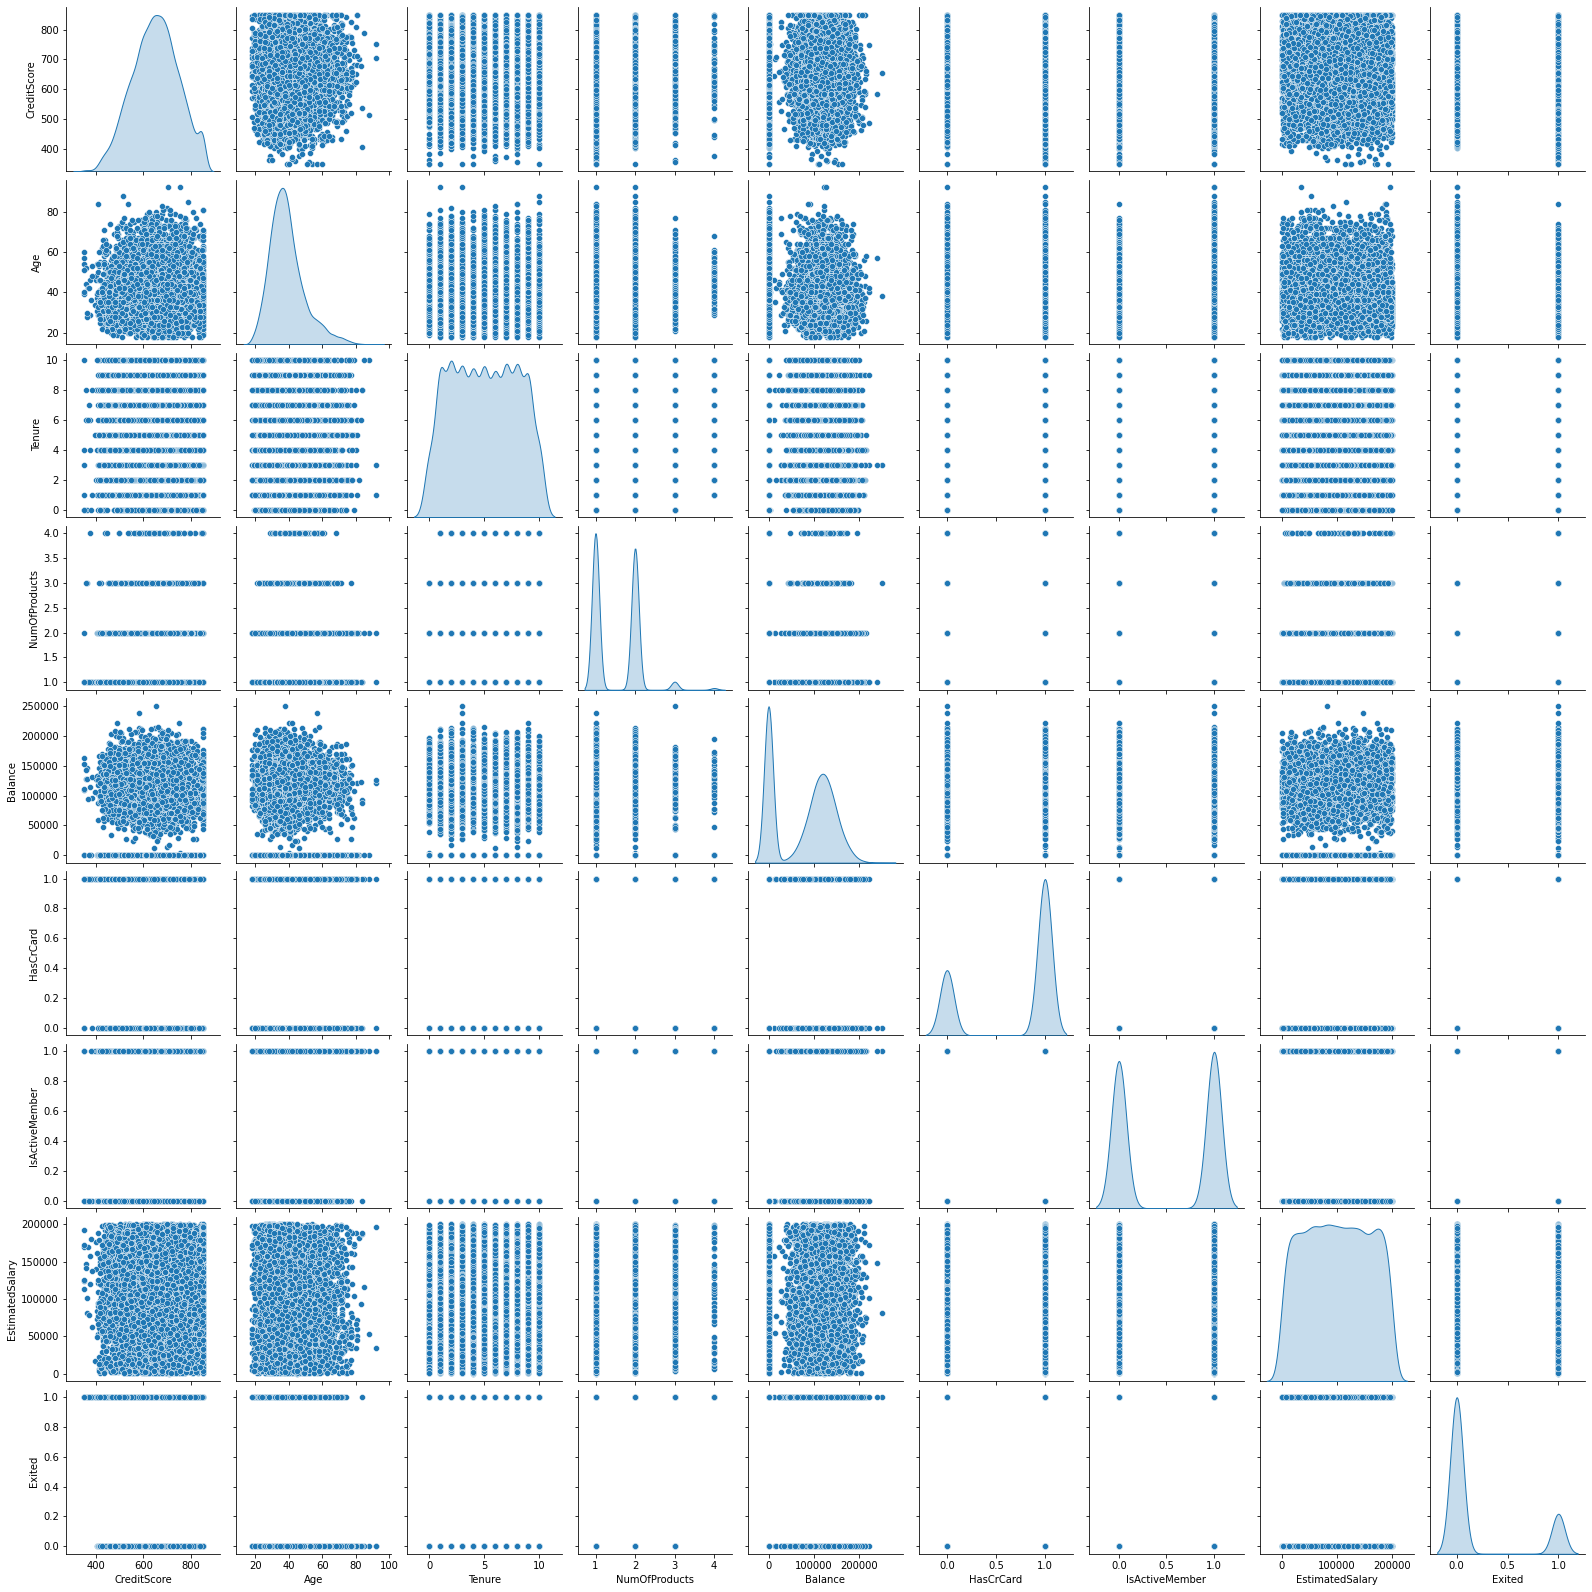

In [16]:
sns.pairplot(df,vars=['CreditScore','Age','Tenure','NumOfProducts','Balance','HasCrCard','IsActiveMember','EstimatedSalary','Exited'],
             diag_kind='kde');

__Observations:__

 - No other correlation can be depicted from the above graph.

## Missing Value Treatment

In [17]:
df.isnull().sum() 

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

 - There are no missing values in the dataset.

## Outlier detection and treatment

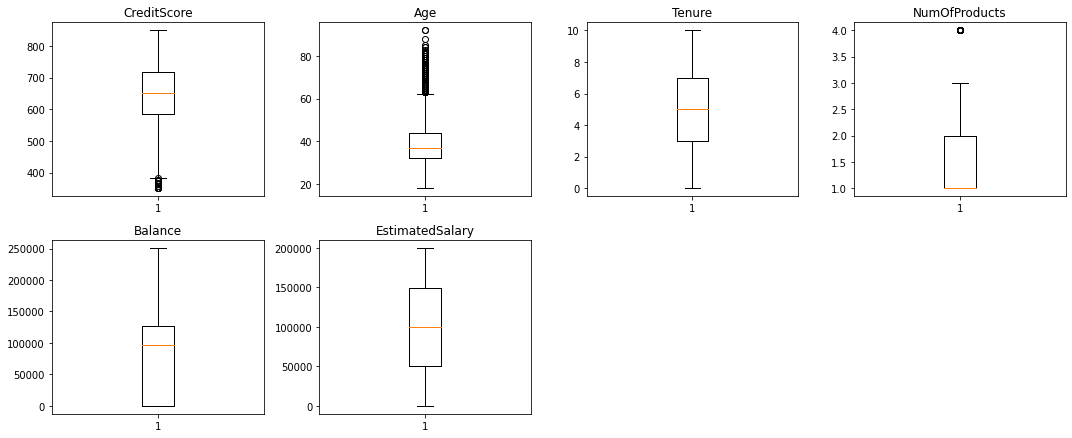

In [18]:
 # list of numerical values in the dataset
columns = ['CreditScore','Age','Tenure','NumOfProducts','Balance','EstimatedSalary'] 

plt.figure(figsize=(15,12)) # specify the size of each plot

for i, variable in enumerate(columns):
    plt.subplot(4,4, i + 1) # specify where to place each plot
    plt.boxplot(df[variable], whis=1.5) # create boxplot
    plt.tight_layout() # used to adjust the subplots
    plt.title(variable) # set the title to be the column name of that particular plot

plt.show()

#### Calculate the outliers in each column

In [19]:
Q1 = df[columns].quantile(0.25) # first quantile -> 25% percentile
Q3 = df[columns].quantile(0.75) # second quantile -> 75% percentile

IQR = Q3 - Q1 # Inter quantile range                  

lower_whisker = Q1 - 1.5*IQR # finding the lower bound   
upper_whisker = Q3 + 1.5*IQR # finding the upper bound

# find the percentage of outliers in each column
((df[columns] < lower_whisker) | (df[columns] > upper_whisker)).sum()/df.shape[0]*100 

CreditScore        0.15
Age                3.59
Tenure             0.00
NumOfProducts      0.60
Balance            0.00
EstimatedSalary    0.00
dtype: float64

__Observations:__

 - There are outliers in creditScore, Age and NumOfProducts columns.
 - The outliers in creditScore need not be treated as there are customers who have recently joined, or customers who might have used their credit score.
 - The outliers in age need not be treated as there can be customers above the age of 60.
 - There can be outliers in NumOfProducts as there are customers who have 4 credit cards which is normal.

## Feature Engineering

### One Hot Encoding

Let us convert the columns having object datatype to categorical datatype

In [20]:
cols = df.select_dtypes(['object'])
cols.columns

Index(['Geography', 'Gender'], dtype='object')

In [21]:
for i in cols.columns:
    df[i] = df[i].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  int64   
 8   IsActiveMember   10000 non-null  int64   
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  int64   
dtypes: category(2), float64(2), int64(7)
memory usage: 723.0 KB


Look at the unique values in the columns having categorical datatype

In [22]:
for i in cols.columns:
    print('Unique values in',i, 'are :')
    print(cols[i].value_counts()) # print the number of unique values in a column
    print()
    print('*'*50+'\n')

Unique values in Geography are :
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

**************************************************

Unique values in Gender are :
Male      5457
Female    4543
Name: Gender, dtype: int64

**************************************************



In [23]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
 11  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB


In [25]:
data = df.copy()

## Check whether the dataset is balanced

In [26]:
n_true = len(df.loc[df['Exited'] == 1])
n_false = len(df.loc[df['Exited'] == 0])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of true cases: 2037 (20.37%)
Number of false cases: 7963 (79.63%)


 - We can see that 20.37% of the customers have exited while 79.63% of the customers are still using the services. 

__The outcome is imbalanced.__

## Split the data

In [27]:
#getting the features and labels and finally splitting the test and train data.
X = df.drop('Exited',axis=1)
Y = df['Exited']

In [28]:
#Splitting the training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1,shuffle=True, stratify=Y)

### Rescaling the data using Standard Scalar

The numerical columns present in the dataset have different units. Hence scaling is done on the dataset. <br>
Since the data is already split into train sets and test sets, we will be scaling both the sets.

In [29]:
## Scaling the data
sc=StandardScaler()
temp = sc.fit(X_train[['CreditScore','Age','Tenure','NumOfProducts','Balance','EstimatedSalary']])
X_train[['CreditScore','Age','Tenure','NumOfProducts','Balance','EstimatedSalary']] = temp.transform(X_train[['CreditScore','Age','Tenure','NumOfProducts','Balance','EstimatedSalary']])
X_test[['CreditScore','Age','Tenure','NumOfProducts','Balance','EstimatedSalary']] = temp.transform(X_test[['CreditScore','Age','Tenure','NumOfProducts','Balance','EstimatedSalary']])

In [30]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7635,-1.385480,-0.938920,-1.035870,0.460208,-0.918448,1,0,1.012113,0,0,0
5284,0.979538,1.142223,-0.689110,0.367663,-0.918448,1,1,-1.235424,1,0,1
1457,2.063934,2.561184,-0.342351,-1.215278,0.788704,0,1,-0.615548,0,0,1
4785,-1.447445,-1.601102,-0.689110,1.287744,-0.918448,0,0,-0.965064,0,0,0
9158,-1.137618,-0.749725,1.738206,0.670495,-0.918448,1,1,1.023469,0,1,0


In [31]:
X_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
6973,0.091365,0.007054,1.044687,0.480589,0.788704,1,1,1.724655,1,0,1
4153,0.463158,1.331418,1.044687,0.304591,-0.918448,0,0,-0.514243,1,0,0
1101,0.545779,-0.938920,1.391447,-1.215278,0.788704,1,0,-0.854748,0,1,1
5076,0.514796,-0.182141,0.697928,-1.215278,0.788704,1,0,-1.443307,0,0,0
7496,1.795417,0.953028,1.044687,0.911051,-0.918448,1,1,-0.553705,1,0,1


## Model Building

### Metric of interest

__What does the bank want?__

To minimise the losses. There are 2 types of losses here.

 - The customer is offered a credit card but they stop using the credit card services.
 - The customer will not leave the credit card services but bank thinks that the customer will leave the credit card services, and not offer a credit card.
Which loss is greater?

Customer leaving the credit card services.

__Since we do not want the customers to stop using the credit card, we will be using recall as the scoring metric.__

Recall - It gives the ratio of True positives to Actual positives, so high Recall implies low false negatives.

### Model 1

In [32]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [33]:
# Initializing the model
model = Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
model.add(Dense(64, activation='relu',kernel_initializer='he_uniform', input_shape=(X_train.shape[1],)))
# Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding the second hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding the output layer with one neuron and linear as activation
model.add(Dense(1, activation='linear'))

In [34]:
# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,937
Trainable params: 3,937
Non-trainable params: 0
_________________________________________________________________


__Observations:__

 - The summary of the model shows each layer's name, type, output shape, the number of parameters at that particular layer, the total number of trainable and non-trainable parameters in the model.
 - In the first layer total parameters are calculated by the number of neurons in the hidden layer multiplied by the number of variables fed to neural networks plus bias. (11*64)+64 = 768.
 - In the next layer the parameters are calculated by the number of outputs from the previous layer multiplied by the number of neurons in the second layer plus bias. (64*32)+32 =2080.
 - In the next layer the parameters are calculated by the number of outputs from the previous layer multiplied by the number of neurons in the third layer plus bias. (32*32)+32 =1056.
 - In the output layer the parameters are calculated by the number of outputs from the previous layer multiplied by the number of neurons in the output layer plus bias. (32*1)+32 =33.

In [35]:
# Initializing the Optimizer
optimizer = optimizers.RMSprop(learning_rate=0.001)
# Compiling the model with 'mse' as loss function and metrics
model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae'])

#fitting the model
history = model.fit(X_train, y_train,epochs=50, validation_split = 0.2, verbose=1)

Epoch 1/50
175/175 [==============================] - 4s 4ms/step - loss: 0.1573 - mae: 0.2954 - val_loss: 0.1399 - val_mae: 0.2605
Epoch 2/50
175/175 [==============================] - 1s 3ms/step - loss: 0.1220 - mae: 0.2526 - val_loss: 0.1282 - val_mae: 0.2714
Epoch 3/50
175/175 [==============================] - 0s 3ms/step - loss: 0.1132 - mae: 0.2395 - val_loss: 0.1295 - val_mae: 0.2446
Epoch 4/50
175/175 [==============================] - 0s 3ms/step - loss: 0.1078 - mae: 0.2302 - val_loss: 0.1219 - val_mae: 0.2350
Epoch 5/50
175/175 [==============================] - 0s 3ms/step - loss: 0.1042 - mae: 0.2237 - val_loss: 0.1214 - val_mae: 0.2527
Epoch 6/50
175/175 [==============================] - 1s 5ms/step - loss: 0.1007 - mae: 0.2182 - val_loss: 0.1215 - val_mae: 0.2336
Epoch 7/50
175/175 [==============================] - 1s 3ms/step - loss: 0.0990 - mae: 0.2159 - val_loss: 0.1243 - val_mae: 0.2268
Epoch 8/50
175/175 [==============================] - 1s 6ms/step - loss: 0.

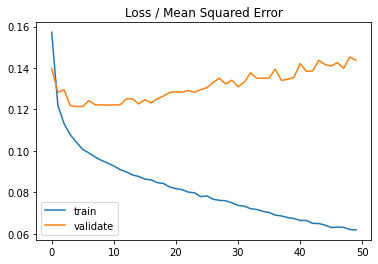

In [36]:
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validate')
plt.legend()
plt.show()

The model seems to be overfitting as the distance between the train curve and validation curve started increasing.

#### Predicting the model

In [37]:
# predicting the model on test data
y_pred=model.predict(X_test)

In [38]:
# As our outputs are probabilities so we will try to get the output class from these probablities by getting the maximum value
y_pred_final=[]
for i in y_pred:
  y_pred_final.append(np.argmax(i))

#### Generating Classification Report

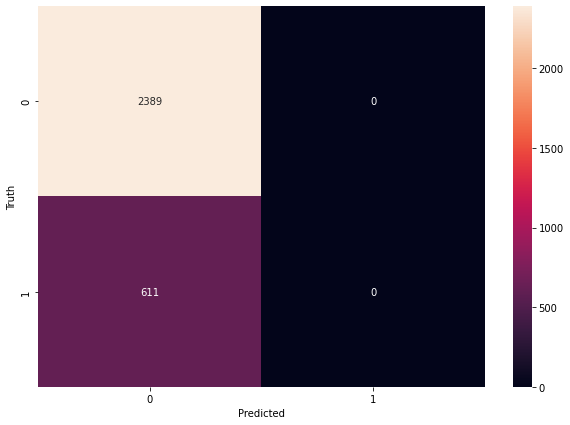

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm=confusion_matrix(y_test,y_pred_final)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2389
           1       0.00      0.00      0.00       611

    accuracy                           0.80      3000
   macro avg       0.40      0.50      0.44      3000
weighted avg       0.63      0.80      0.71      3000



As you can see, the above model has a good accuracy but a poor Recall. This could be due to the imbalanced dataset. We observe that the False positive rates are also high, which should be considerably lower.

1) __Imbalanced dataset:__ As you have seen in the EDA, this dataset is imbalanced, and it contains more examples that belong to the 0 class.

2) __Decision Threshold:__ Due to the imbalanced dataset, we can use ROC-AUC to find the optimal threshold and use the same for prediction.

### Model 2

Let us increase the number of hidden layers to 4 and use Adam optimizer

In [41]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [42]:
# Initializing the model
model_1 = Sequential()
# Adding input layer with 128 neurons, relu as activation function and, he_uniform as weight initializer.
model_1.add(Dense(128, activation='relu',kernel_initializer='he_uniform', input_shape=(X_train.shape[1],)))
# Adding the first hidden layer with 64 neurons, relu as activation function and, he_uniform as weight initializer
model_1.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
# Adding the second hidden layer with 64 neurons, relu as activation function and, he_uniform as weight initializer
model_1.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
# Adding the third hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_1.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding the fourth hidden layer with 16 neurons, relu as activation function and, he_uniform as weight initializer
model_1.add(Dense(16, activation='relu',kernel_initializer='he_uniform'))
# Adding the output layer with one neuron and linear as activation
model_1.add(Dense(1, activation='linear'))

In [43]:
# Model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 16,577
Trainable params: 16,577
Non-traina

In [44]:
optimizer = optimizers.Adam(0.001)
model_1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

#fitting the model
history_1 = model_1.fit(X_train, y_train,epochs=50, validation_split = 0.2, verbose=1)

Epoch 1/50
175/175 [==============================] - 2s 4ms/step - loss: 1.5201 - accuracy: 0.7941 - val_loss: 0.6526 - val_accuracy: 0.7793
Epoch 2/50
175/175 [==============================] - 1s 3ms/step - loss: 0.5943 - accuracy: 0.7884 - val_loss: 0.6214 - val_accuracy: 0.7564
Epoch 3/50
175/175 [==============================] - 1s 3ms/step - loss: 0.4995 - accuracy: 0.8302 - val_loss: 0.5011 - val_accuracy: 0.8279
Epoch 4/50
175/175 [==============================] - 0s 3ms/step - loss: 0.4458 - accuracy: 0.8359 - val_loss: 0.5653 - val_accuracy: 0.8343
Epoch 5/50
175/175 [==============================] - 1s 3ms/step - loss: 0.5130 - accuracy: 0.8441 - val_loss: 0.5998 - val_accuracy: 0.7993
Epoch 6/50
175/175 [==============================] - 1s 3ms/step - loss: 0.4671 - accuracy: 0.8407 - val_loss: 0.4832 - val_accuracy: 0.8321
Epoch 7/50
175/175 [==============================] - 1s 3ms/step - loss: 0.4415 - accuracy: 0.8434 - val_loss: 0.6931 - val_accuracy: 0.8264
Epoch 

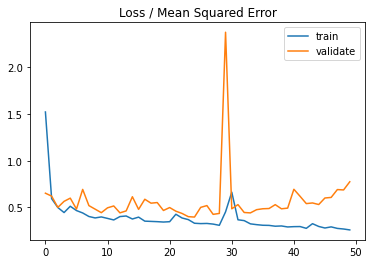

In [45]:
plt.title('Loss / Mean Squared Error')
plt.plot(history_1.history['loss'], label='train')
plt.plot(history_1.history['val_loss'], label='validate')
plt.legend()
plt.show()

We have increased the depth and used adam optimizer in this model.<br>
The distance between the train and test set seems to be decreased. The curve seems to be better when compared to the previous model. But still the curve is not smooth. 

### Predicting the model

In [46]:
# predicting the model on test data
y_pred_1=model_1.predict(X_test)

In [47]:
# As our outputs are probabilities so we will try to get the output class from these probablities by getting the maximum value
y_pred_final_1=[]
for i in y_pred_1:
  y_pred_final_1.append(np.argmax(i))

### Generating classification report

#### Create confusion matrix

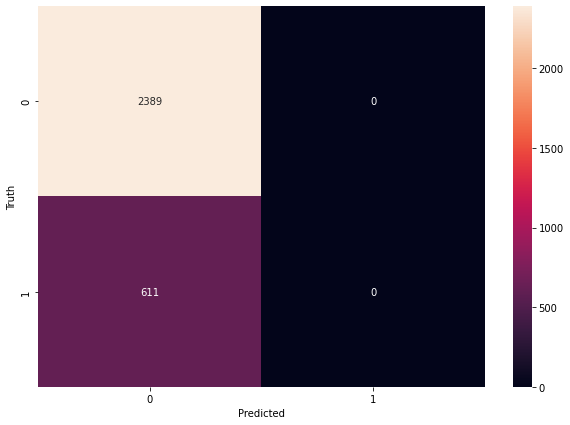

In [48]:
cm=confusion_matrix(y_test,y_pred_final_1)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [49]:
print(classification_report(y_test,y_pred_final_1))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2389
           1       0.00      0.00      0.00       611

    accuracy                           0.80      3000
   macro avg       0.40      0.50      0.44      3000
weighted avg       0.63      0.80      0.71      3000



There is no difference in the ccuracy and recall in this model, compared to previous model even though the ROC-AUC curve have improved. This can be due to __imbalanced data__.

### Model 3

Let us use batch normalization in this model. 

In [50]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [51]:
# Initializing the model
model_2 = Sequential()

# Adding input layer with 128 neurons, relu as activation function and, he_uniform as weight initializer.
model_2.add(Dense(128, activation='relu',kernel_initializer='he_uniform', input_shape=(X_train.shape[1],)))

# Use batch normalization
model_2.add(BatchNormalization())
# Adding the first hidden layer with 64 neurons, relu as activation function and, he_uniform as weight initializer
model_2.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))

# Use batch normalization
model_2.add(BatchNormalization())
# Adding the second hidden layer with 64 neurons, relu as activation function and, he_uniform as weight initializer
model_2.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))

# Use batch normalization
model_2.add(BatchNormalization())
# Adding the third hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_2.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))

# Use batch normalization
model_2.add(BatchNormalization())
# Adding the fourth hidden layer with 16 neurons, relu as activation function and, he_uniform as weight initializer
model_2.add(Dense(16, activation='relu',kernel_initializer='he_uniform'))

# Adding the output layer with one neuron and linear as activation
model_2.add(Dense(1, activation='linear'))

In [52]:
# Model summary
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 batch_normalization_2 (Batc  (None, 64)               2

In [53]:
optimizer = optimizers.Adam(0.001)
model_2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

#fitting the model
history_2 = model_2.fit(X_train, y_train,epochs=50, validation_split = 0.2, verbose=1)

Epoch 1/50
175/175 [==============================] - 2s 6ms/step - loss: 2.7013 - accuracy: 0.7809 - val_loss: 2.6273 - val_accuracy: 0.7779
Epoch 2/50
175/175 [==============================] - 1s 7ms/step - loss: 2.4236 - accuracy: 0.8037 - val_loss: 2.4591 - val_accuracy: 0.8171
Epoch 3/50
175/175 [==============================] - 1s 6ms/step - loss: 2.2948 - accuracy: 0.8009 - val_loss: 2.4757 - val_accuracy: 0.8000
Epoch 4/50
175/175 [==============================] - 1s 6ms/step - loss: 2.0856 - accuracy: 0.8213 - val_loss: 2.1570 - val_accuracy: 0.8186
Epoch 5/50
175/175 [==============================] - 1s 4ms/step - loss: 1.9795 - accuracy: 0.8229 - val_loss: 2.4897 - val_accuracy: 0.7964
Epoch 6/50
175/175 [==============================] - 1s 4ms/step - loss: 2.1560 - accuracy: 0.8086 - val_loss: 2.2436 - val_accuracy: 0.8107
Epoch 7/50
175/175 [==============================] - 1s 4ms/step - loss: 2.0966 - accuracy: 0.8209 - val_loss: 2.3457 - val_accuracy: 0.7993
Epoch 

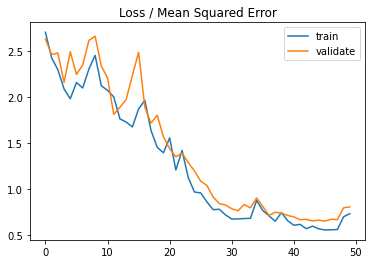

In [54]:
plt.title('Loss / Mean Squared Error')
plt.plot(history_2.history['loss'], label='train')
plt.plot(history_2.history['val_loss'], label='validate')
plt.legend()
plt.show()

The difference seems to be reduced. The curve is smoother when compared to previous model.

### Predicting the model

In [55]:
# predicting the model on test data
y_pred_2=model_2.predict(X_test)

In [56]:
# As our outputs are probabilities so we will try to get the output class from these probablities by getting the maximum value
y_pred_final_2=[]
for i in y_pred_2:
  y_pred_final_2.append(np.argmax(i))

### Generating Classification Report

#### Confusion matrix

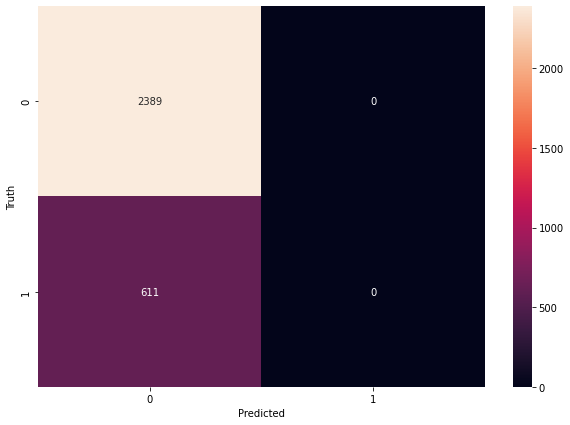

In [57]:
cm=confusion_matrix(y_test,y_pred_final_2)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [58]:
print(classification_report(y_test,y_pred_final_2))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2389
           1       0.00      0.00      0.00       611

    accuracy                           0.80      3000
   macro avg       0.40      0.50      0.44      3000
weighted avg       0.63      0.80      0.71      3000



There is no change in accuracy and recall. The ROC-AUC curve seems to be smoother.

### Model 4

Let us use dropout of 0.3 in this model.

In [59]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [60]:
# Initializing the model
model_3 = Sequential()

# Adding input layer with 128 neurons, relu as activation function and, he_uniform as weight initializer.
model_3.add(Dense(128, activation='relu',kernel_initializer='he_uniform', input_shape=(X_train.shape[1],)))

# Use dropout
model_3.add(Dropout(0.2))
# Adding the first hidden layer with 64 neurons, relu as activation function and, he_uniform as weight initializer
model_3.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))

# Use dropout
model_3.add(Dropout(0.2))
# Adding the second hidden layer with 64 neurons, relu as activation function and, he_uniform as weight initializer
model_3.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))

# Use dropout
model_3.add(Dropout(0.2))
# Adding the third hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_3.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))

# Adding the fourth hidden layer with 16 neurons, relu as activation function and, he_uniform as weight initializer
model_3.add(Dense(16, activation='relu',kernel_initializer='he_uniform'))

# Adding the output layer with one neuron and linear as activation
model_3.add(Dense(1, activation='linear'))

In [61]:
optimizer = optimizers.Adam(0.001)
model_3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

#fitting the model
history_3 = model_3.fit(X_train, y_train,epochs=50, validation_split = 0.2, verbose=1)

Epoch 1/50
175/175 [==============================] - 1s 4ms/step - loss: 3.0809 - accuracy: 0.7998 - val_loss: 3.3825 - val_accuracy: 0.7807
Epoch 2/50
175/175 [==============================] - 1s 3ms/step - loss: 3.0737 - accuracy: 0.7995 - val_loss: 3.3825 - val_accuracy: 0.7807
Epoch 3/50
175/175 [==============================] - 1s 3ms/step - loss: 3.0822 - accuracy: 0.8002 - val_loss: 3.3825 - val_accuracy: 0.7807
Epoch 4/50
175/175 [==============================] - 1s 3ms/step - loss: 3.0775 - accuracy: 0.8002 - val_loss: 3.3825 - val_accuracy: 0.7807
Epoch 5/50
175/175 [==============================] - 1s 3ms/step - loss: 3.0713 - accuracy: 0.7996 - val_loss: 3.3825 - val_accuracy: 0.7807
Epoch 6/50
175/175 [==============================] - 1s 3ms/step - loss: 3.0822 - accuracy: 0.8002 - val_loss: 3.3825 - val_accuracy: 0.7807
Epoch 7/50
175/175 [==============================] - 1s 4ms/step - loss: 3.0822 - accuracy: 0.8002 - val_loss: 3.3825 - val_accuracy: 0.7807
Epoch 

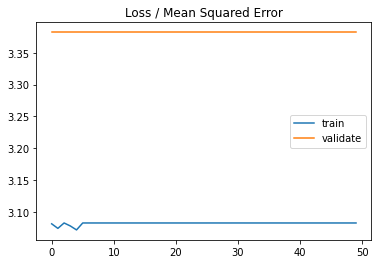

In [62]:
plt.title('Loss / Mean Squared Error')
plt.plot(history_3.history['loss'], label='train')
plt.plot(history_3.history['val_loss'], label='validate')
plt.legend()
plt.show()

There is a huge difference in the training and test curve. Dropout clearly does not work in this dataset.

### Predicting the model

In [63]:
# predicting the model on test data
y_pred_3=model_3.predict(X_test)

In [64]:
# As our outputs are probabilities so we will try to get the output class from these probablities by getting the maximum value
y_pred_final_3=[]
for i in y_pred_3:
  y_pred_final_3.append(np.argmax(i))

### Generate classification report

#### Confusion matrix

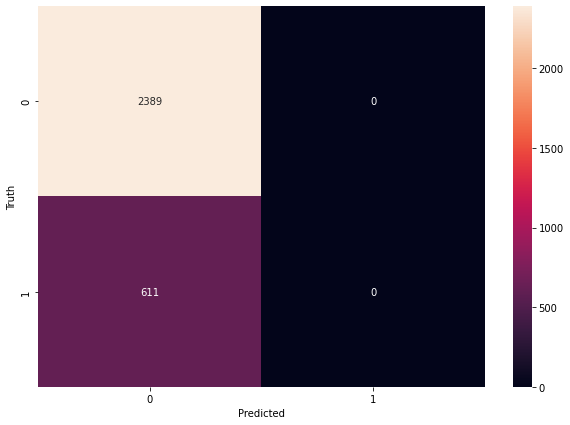

In [65]:
cm=confusion_matrix(y_test,y_pred_final_3)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [66]:
print(classification_report(y_test,y_pred_final_3))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2389
           1       0.00      0.00      0.00       611

    accuracy                           0.80      3000
   macro avg       0.40      0.50      0.44      3000
weighted avg       0.63      0.80      0.71      3000



There is no dfference in the accuracy and recall.

### Model 4

Let us use SMOTE to oversample the data and handle the imbalanced data, along with adam optimizer.

In [67]:
##Applying SMOTE on train and test
from imblearn.over_sampling import SMOTE

# Fit SMOTE on train data(Synthetic Minority Oversampling Technique)
sm = SMOTE(sampling_strategy=0.4, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [68]:
print("Before OverSampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After OverSampling, count of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, count of label '0': {} \n".format(sum(y_train_over == 0)))

print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, count of label '1': 1426
Before OverSampling, count of label '0': 5574 

After OverSampling, count of label '1': 2229
After OverSampling, count of label '0': 5574 

After OverSampling, the shape of train_X: (7803, 11)
After OverSampling, the shape of train_y: (7803,) 



Now let us apply this oversampled data in our model.

In [69]:
# Initializing the model
model_4 = Sequential()
# Adding input layer with 128 neurons, relu as activation function and, he_uniform as weight initializer.
model_4.add(Dense(128, activation='relu',kernel_initializer='he_uniform', input_shape=(X_train_over.shape[1],)))
# Adding the first hidden layer with 64 neurons, relu as activation function and, he_uniform as weight initializer
model_4.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
# Adding the second hidden layer with 64 neurons, relu as activation function and, he_uniform as weight initializer
model_4.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
# Adding the third hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_4.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding the fourth hidden layer with 16 neurons, relu as activation function and, he_uniform as weight initializer
model_4.add(Dense(16, activation='relu',kernel_initializer='he_uniform'))
# Adding the output layer with one neuron and linear as activation
model_4.add(Dense(1, activation='linear'))

In [70]:
optimizer = optimizers.Adam(0.001)
model_4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

#fitting the model
history_4 = model_4.fit(X_train_over, y_train_over,epochs=50, validation_split = 0.2, verbose=1)

Epoch 1/50
196/196 [==============================] - 1s 4ms/step - loss: 1.9415 - accuracy: 0.7876 - val_loss: 1.1336 - val_accuracy: 0.5951
Epoch 2/50
196/196 [==============================] - 1s 3ms/step - loss: 0.5614 - accuracy: 0.8082 - val_loss: 0.9402 - val_accuracy: 0.5259
Epoch 3/50
196/196 [==============================] - 1s 4ms/step - loss: 0.5605 - accuracy: 0.8305 - val_loss: 7.9222 - val_accuracy: 0.3978
Epoch 4/50
196/196 [==============================] - 1s 4ms/step - loss: 1.3929 - accuracy: 0.7916 - val_loss: 1.1045 - val_accuracy: 0.6368
Epoch 5/50
196/196 [==============================] - 1s 4ms/step - loss: 0.6108 - accuracy: 0.8142 - val_loss: 2.2013 - val_accuracy: 0.6438
Epoch 6/50
196/196 [==============================] - 1s 4ms/step - loss: 1.2303 - accuracy: 0.7812 - val_loss: 0.6562 - val_accuracy: 0.6464
Epoch 7/50
196/196 [==============================] - 1s 4ms/step - loss: 0.4749 - accuracy: 0.8268 - val_loss: 0.7281 - val_accuracy: 0.6425
Epoch 

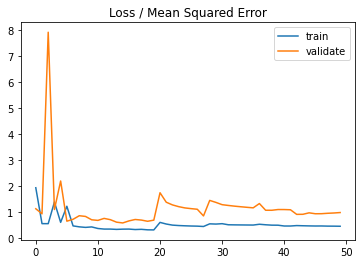

In [71]:
plt.title('Loss / Mean Squared Error')
plt.plot(history_4.history['loss'], label='train')
plt.plot(history_4.history['val_loss'], label='validate')
plt.legend()
plt.show()

There is a major difference between the train and test set, even though the curve is even. Handling the imbalanced data was not very effective.

### Predicting the model

In [72]:
# predicting the model on test data
y_pred_4=model_4.predict(X_test)

In [73]:
# As our outputs are probabilities so we will try to get the output class from these probablities by getting the maximum value
y_pred_final_4=[]
for i in y_pred_4:
  y_pred_final_4.append(np.argmax(i))

### Generate classification report

#### Confusion matrix

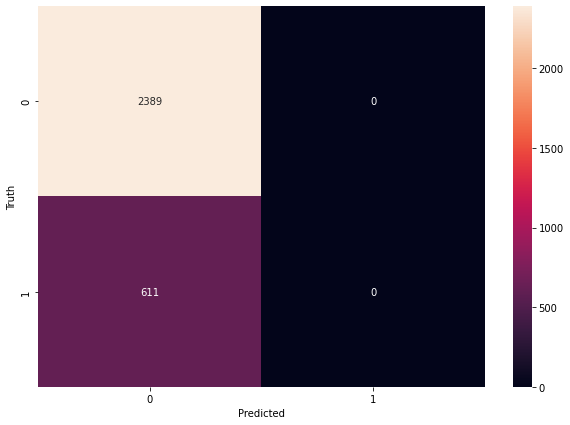

In [74]:
cm=confusion_matrix(y_test,y_pred_final_4)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [75]:
print(classification_report(y_test,y_pred_final_4))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2389
           1       0.00      0.00      0.00       611

    accuracy                           0.80      3000
   macro avg       0.40      0.50      0.44      3000
weighted avg       0.63      0.80      0.71      3000



There is no dfference in the accuracy and recall even after handling imbalanced data.  

## Model Performance Evaluation

We have built ANN models with 2 hidden nodes, 4 hidden nodes, used batch normalisation, used dropout and oversampled the data.<br>
 
Using all these methods we could see that there was no improvement in the accuracy, recall and F1 score of the model due to imbalanced data.<br>
 
__When we compare the ROC-AUC curve we come to a conclusion that the model with 4 hidden layers along with batch normalisation has a smoother curve when compared to all the other models. So we will be going with this model.__


#### Scope for improvement

 - We can use undersampling to balance the outcome variable and create a model based on this data, but there are chances of losing key patterns.<br>
 - GridSearchCV or RandomSearchCV can be used to optimise the neural network model.

## Insights:



- We can see that the credit card services are being used by customers of all age groups.
- There are some customers using 4 cards while the majority of the customers are using 1-2 cards.
- The dataset contains details of 10000 customers where 4000 customers have a 0 balance. Either the customer is a new user or the customer has exited from the services.
- Both males and females use the services but we can see most of the females have exited the services.
- These services are being used by customers based from France, Spain and Germany. There are few customers in germany and majority of the customers who have exited are also from germany.
 
#### Model 1:
  
  - This model is a basic ANN model with 2 hidden layers and RMSProp optimiser.
  - The ROC-AUC curve in the model had an increasing distance between the train and test set due to overfitting.
  - The model had an accuracy of 80% but the recall was 50%.
  
#### Model 2:
  
  - This model is a basic ANN model with 4 hidden layers and Adam optimiser.
  - There was an improvement in the ROC-AUC curve, but still there was an increased distance towards the end of the curve.
  - The model had an accuracy of 80% but the recall was 50%.
 
#### Model 3:
 
 - This model was built by applying batch normalisation in all the hidden layers with Adam optimizer.
 - The ROC-AUC curve is smoother in this model, the best curve compared to all the other models.
 - The model had an accuracy of 80% but the recall was 50%.
 
#### Model 4:
 
 - In this model dropout of 20% was used along with Adam optimizer.
 - There is a very huge distance between the train and the test curve.
 - The model had an accuracy of 80% but the recall was 50%.
 - Dropout clearly did not work well with this dataset.
 
#### Model 5:
 
 -  We applied oversampling with SMOTE in this model and used Adam optimiser.
 - There is a major difference between the train and test set, even though the curve is even. Handling the imbalanced data was not very effective.
 - The model had an accuracy of 80% but the recall was 50%.
 
__We go with Model 3, where we used batch normalisation and Adam optimizer.__


## Recommendations:

 - We can see that customers from germany are in majority who are leaving the credit card services. We need to do a deeper market analysis to understand the reasons for this and come up with a strategy to get more customers from this region.
 - Females are mostly discontinuing the usage of credit cards. Benefits of credit points and offers available using the credit cards have to be conveyed so that there will be decrease in the number of customers exiting the services.
 - Advertising of benefits and offers available on using the credit cards have to be done, which might attract new customers.